In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from functions import prepare_data

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfVectorizer

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
data = prepare_data()
data = shuffle(data)

In [37]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(15535,)))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
data.head()

,text,truncated,party
id,,,
1179881196936937473,(1 of 2) Socialist healthcare proposals like M...,True,1
1180261270412500994,Kicked off #MFGDay19 early this week with a vi...,True,1
1180128732675235846,"Real results, despite every obstacle by the #D...",False,1
1179927918073520128,#Police #ThinBlueLine \n\nHorrible. Four polic...,True,1
1179856200088915973,First the Green New Deal does away with Now ...,True,1


In [5]:
X = data['text']
y = pd.get_dummies(data['party'])

y.head()

,0,1
id,,
1179881196936937473,0,1
1180261270412500994,0,1
1180128732675235846,0,1
1179927918073520128,0,1
1179856200088915973,0,1


In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
transformer = vectorizer.fit_transform(X)

In [10]:
processed = pd.DataFrame(data = transformer.toarray(), index=X.index)

In [38]:
predictors = processed.as_matrix()
target = y.values

es_rounds = EarlyStopping(patience=15)

/home/danailkrzhalovski/Uni/Cognitive_Behavioral_And_Social_Data/TwiterPolitics/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [39]:
history = model.fit(predictors, target, validation_split=0.2, epochs=50, callbacks=[es_rounds])

Train on 872 samples, validate on 218 samples
Epoch 1/50
872/872 [==============================] - 1s 958us/step - loss: 0.6920 - accuracy: 0.5694 - val_loss: 0.6899 - val_accuracy: 0.6055
Epoch 2/50
872/872 [==============================] - 1s 987us/step - loss: 0.6443 - accuracy: 0.9644 - val_loss: 0.6627 - val_accuracy: 0.6445
Epoch 3/50
872/872 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.9828 - val_loss: 0.6084 - val_accuracy: 0.6812
Epoch 4/50
872/872 [==============================] - 1s 1ms/step - loss: 0.1523 - accuracy: 0.9914 - val_loss: 0.5888 - val_accuracy: 0.6697
Epoch 5/50
872/872 [==============================] - 1s 913us/step - loss: 0.0457 - accuracy: 0.9920 - val_loss: 0.5866 - val_accuracy: 0.6972
Epoch 6/50
872/872 [==============================] - 1s 1ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.5991 - val_accuracy: 0.6743
Epoch 7/50
872/872 [==============================] - 1s 1ms/step - loss: 0.0179 - accuracy: 0.9

In [18]:
history.history['val_loss']

[1.3140237025164683,
 1.1007265929782062,
 1.0711664858214351,
 1.087492067879493,
 0.9667674505382503,
 0.8551034293043505,
 0.9045065171128019,
 0.9323241141957974,
 0.9493515316499482,
 0.9721517448031575]

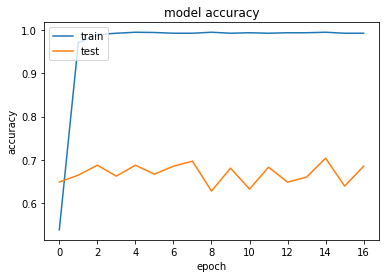

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

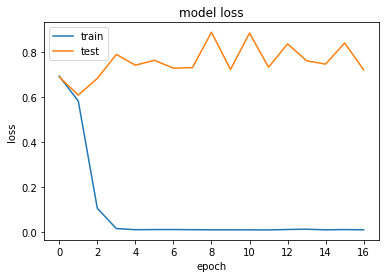

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()